# Titanic Analysis

To practice the concepts learned in class, download and analyze the Titanic Data Set

Links to an external site.. You can use the train.csv file for your analysis. Try to answer the following questions:

1. Which categories of passengers were most likely to survive? What characteristics contributed to their survival?

2. What data cleaning techniques did you use, and what were the results?

3. Did you engineer any features? Which ones, and why?

# Step 1: Import Statements

In [747]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [748]:
# Import the titanic data file, which is the train.csv
# Original file can be found here: https://www.kaggle.com/competitions/titanic/data?select=train.csv

df = pd.read_csv("https://raw.githubusercontent.com/TangoMango223/schulich_MBAN6110/main/practice_questions/train.csv")

In [749]:
# Initialize "top-level" view of the titanic data
df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [750]:
# Remove index column, it's not really necessary:
df.reset_index(drop=True, inplace=True)

In [751]:
# Check head now:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [752]:
# Check the characteristics of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Initial Comments:
There is a total of 891 entries. However,we notice that "Age", "Cabin" and "Embarked" information is missing rows. 
We will need to consider how to treat the two columns later. 
All other rows do not appear to be missing rows or ISNA.

In [753]:
# Check some descriptive statistics
df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Identify the input and output variables

# Output variables:
From this Titanic data, the objective is to predict which passengers were more likely to have survived the Titanic sinking.
This is denoted in Column "Survived", which is our output variable.

Output variable:
* Survived

# Input variables: 
PClass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin and Embarked, are considered input variables.
They are a mix of numerical and categorical variables:

Categorical Variables:
* PClass
* Name
* Sex
* SibSp
* Parch
* Cabin
* Embarked


Numerical Variables:
* Age
* Fare

However, it's important to note that not all variables will have a strong Pearson-R correlation with the output variable, "Survived".

## Descriptive Statistics - Summary:

For all of the variables (except Passengerid, which is an identifier), we notice some interesting characteristics.

*Survived variable - Binary
There are a total of 891 rows, and there's no missing data which is good news. However, we know that 0 = did not survive, 1 = survived.
The mean is 0.3838, with the 75% of the data being 1.0. 
This suggests a high number of passengers did not survive, which we can verify from a value_count and also checking histogram.
We can see in the histogram below.

__PClass - Categorical:__
No missing data. 

__Name - Categorical:__
No missing data.

__Fare - Categorical:__
No missing data.

__Age - Numerical__
We are missing data for this one.

__Sex - Categorical:__
No missing data.

__Sibsp and Parch - Categorical:__
No missing data.

__Cabin - Categorical:__
We are missing data for this one.

__Ticket - Numerical__
No missing data.

__Embarked - Categorical__
We are missing data for this one.




<Axes: xlabel='Survived', ylabel='Count'>

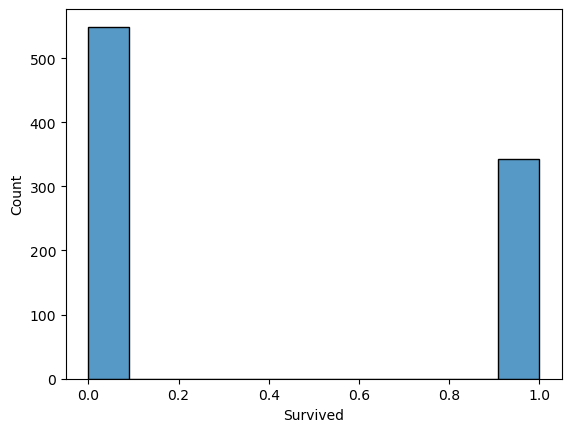

In [754]:
# Check histogram of "Survived"
sns.histplot(data = df, x = df["Survived"])


In [755]:
# Total passengers:
num_passengers = df.shape[0] # 891 passengers

# Check number of survivors:
survivor_counts = df["Survived"].value_counts()
print(survivor_counts)

print("\n")

# # Normalize
survivor_perc = df["Survived"].value_counts(normalize = True)
print(survivor_perc)

# # Percentage of survivors vs. non-survivors:
# num_survivors = survivor_counts[0] / num_passengers
# num_not_survivors =survivor_counts[1] / num_passengers

# print(num_passengers)
# print(num_survivors)
# print(num_not_survivors)

# # Check Math:
# assert num_not_survivors + num_survivors == 1


Survived
0    549
1    342
Name: count, dtype: int64


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


<Axes: xlabel='Fare', ylabel='Count'>

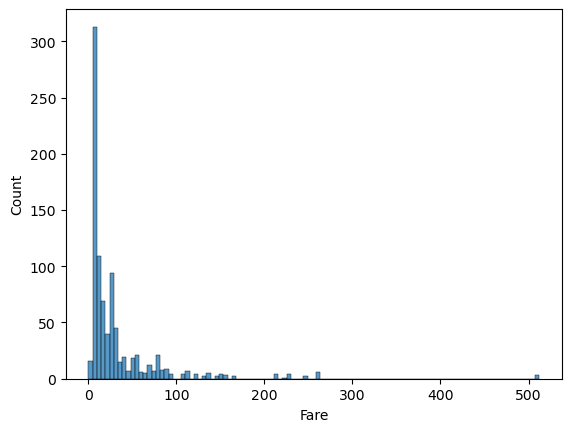

In [756]:
# Check fare paid - right tailed in terms of fare distribution
sns.histplot(data = df, x = df["Fare"])


<Axes: xlabel='Pclass', ylabel='Fare'>

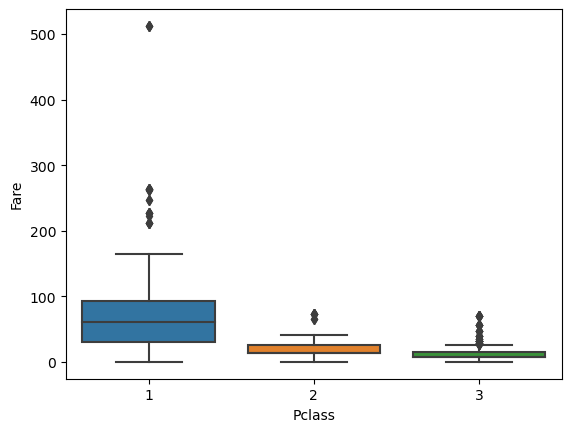

In [757]:
# Check fare paid - right tailed
sns.boxplot(data = df, x = "Pclass", y = "Fare")

In [800]:
# To check correlation, we need to clean up the dataset.

# Firstly, let's create a column that grabs the titles, and then we can remove the "Names" Column.
# Rationale - based on the goal of predicting survival, there's no importance to the name, but the title might have some indication.
# For example, title might be connected to class, position in society, etc.

#Feature Engineering - Retrieve Title - Target Encoding
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

df["Title"].value_counts()

# # Calculate the means. It looks correct, since the mean survival is between 0 to 1
# Title_eng_dumm = df.groupby('Title')['Survived'].mean()
# Title_eng_dumm

# # Add this to the df. Map the mean survival rates to the titles.
# df["Title_Target_Encoded"] = df["Title"].map(Title_eng_dumm)


# Method #2: Ordinance Encoding
# df['Cabin_Target_Encoded'] = df['Cabin_First_Letter'].map(cabin_means)
df['Title_Target_Encoded'] = pd.factorize(df['Title'])[0] + 1

df.head(5)

# Legend:
legend = df[["Title_Target_Encoded", "Title"]].drop_duplicates().set_index("Title_Target_Encoded") # still a data_frame
legend 

# updated_legend = legend.to_dict("split")

# updated_legend

# # Remove "Name":
# df.drop(columns = ["Name"])


,Title
Title_Target_Encoded,
1,Mr
2,Mrs
3,Miss
4,Master
5,Don
6,Rev
7,Dr
8,Mme
9,Ms


In [759]:
# Feature Engineering - Sex column.
# Since it's only two possible results, it is binary. We can use One-Shot Encoding:

sex_type_dumm = pd.get_dummies(df["Sex"], drop_first=True)

df = pd.concat([df, sex_type_dumm], axis=1)

df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Target_Encoded,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,3,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,True


In [760]:
# Feature_Engineering for Embarked as well.
# Since it's 3 variables, we can make dummies as well

embarked_type_dumm = pd.get_dummies(data= df["Embarked"], columns=df["Embarked"], drop_first=True)
embarked_type_dumm

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [761]:
# Fill NaN values with a placeholder 'U'
df['Cabin'].fillna('U', inplace=True)

# Extract the Cabin-Level as feature engineering:
df['Cabin_First_Letter'] = df['Cabin'].str[0]
df['Cabin_First_Letter']

# Let's check how many unknown there are:
df['Cabin_First_Letter'].value_counts(dropna = False)

# # Let's keep it for now, and we can drop the column later. 

# # Feature Engineering = Target Encoding - Method #1

# # Calculate mean survival rate for each cabin letter
# cabin_means = df.groupby('Cabin_First_Letter')['Survived'].mean()

# # Map the means to the cabin letters
# df['Cabin_Target_Encoded'] = df['Cabin_First_Letter'].map(cabin_means)

# # # Check head:
# # df.head(5)

Cabin_First_Letter
U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [762]:
# Method #2 - Ordinance Encoding, i.e. A = 1, B = 2 ...

# df['Cabin_Target_Encoded'] = df['Cabin_First_Letter'].map(cabin_means)
df['Cabin_Target_Encoded'] = pd.factorize(df['Cabin_First_Letter'])[0] + 1

df.head(5)

df['Cabin_Target_Encoded'].value_counts()


Cabin_Target_Encoded
1    687
2     59
7     47
5     33
3     32
6     15
8     13
4      4
9      1
Name: count, dtype: int64

In [763]:
# Ticket Encoding:
df["Ticket"].value_counts().sort_index(ascending=False).sort_values(ascending=False) 



Ticket
CA. 2343    7
1601        7
347082      7
347088      6
CA 2144     6
           ..
PC 17601    1
349239      1
349240      1
349241      1
347464      1
Name: count, Length: 681, dtype: int64

In [764]:
# For now, I will drop this column.
# As seen below, it has 681 unique entries, and there doesn't seem to be a pattern like Cabin or Title name.
# We could consider extracting any letters and splitting by only numbers vs. only text. For now I will drop this.

check = df["Ticket"].nunique()
print(check)

681


In [765]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Target_Encoded,male,Cabin_First_Letter,Cabin_Target_Encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr,1,True,U,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,False,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,3,False,U,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,False,C,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr,1,True,U,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,U,Q,Mr,1,True,U,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,1,True,E,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,U,S,Master,4,True,U,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,U,S,Mrs,2,False,U,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,U,C,Mrs,2,False,U,1


In [766]:
# Age Treatment since it's missing values

df["Age"].value_counts(dropna=False)

# Check box plot
# sns.boxplot(y = df_no_luxury["bedrooms"]) 

Age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 89, dtype: int64

In [767]:
# Extract columns we want for Pearson-R check:
new_df_encoded = df[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare", "Title_Target_Encoded", "male", "Cabin_Target_Encoded"]]

new_df_encoded.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Title_Target_Encoded,male,Cabin_Target_Encoded
0,0,3,22.0,1,0,7.2500,1,True,1
1,1,1,38.0,1,0,71.2833,2,False,2
2,1,3,26.0,0,0,7.9250,3,False,1
3,1,1,35.0,1,0,53.1000,2,False,2
4,0,3,35.0,0,0,8.0500,1,True,1
5,0,3,NaN,0,0,8.4583,1,True,1
6,0,1,54.0,0,0,51.8625,1,True,3
7,0,3,2.0,3,1,21.0750,4,True,1
8,1,3,27.0,0,2,11.1333,2,False,1
9,1,2,14.0,1,0,30.0708,2,False,1


In [768]:
# Check Age:
new_df_encoded["Age"].value_counts(dropna=False)

Age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 89, dtype: int64

<Axes: ylabel='Age'>

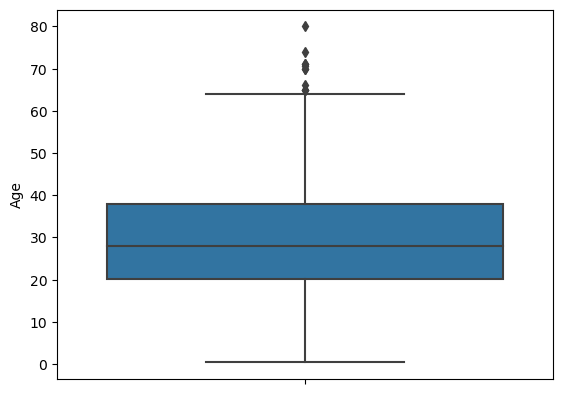

In [769]:
# Check box plot
sns.boxplot(y = new_df_encoded["Age"])

In [770]:
# We have some outliers in terms of age, let's check them.

# Calculate IQR and extract the rows with outliers for Age:
# Find QRs
Q1 = new_df_encoded['Age'].quantile(0.25)
Q3 = new_df_encoded['Age'].quantile(0.75)
IQR = Q3 - Q1

# Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter for them:
outliers = new_df_encoded[(new_df_encoded['Age'] < lower_bound) | (new_df_encoded['Age'] > upper_bound)]
outliers.index # There are 11 very old people



Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

<Axes: >

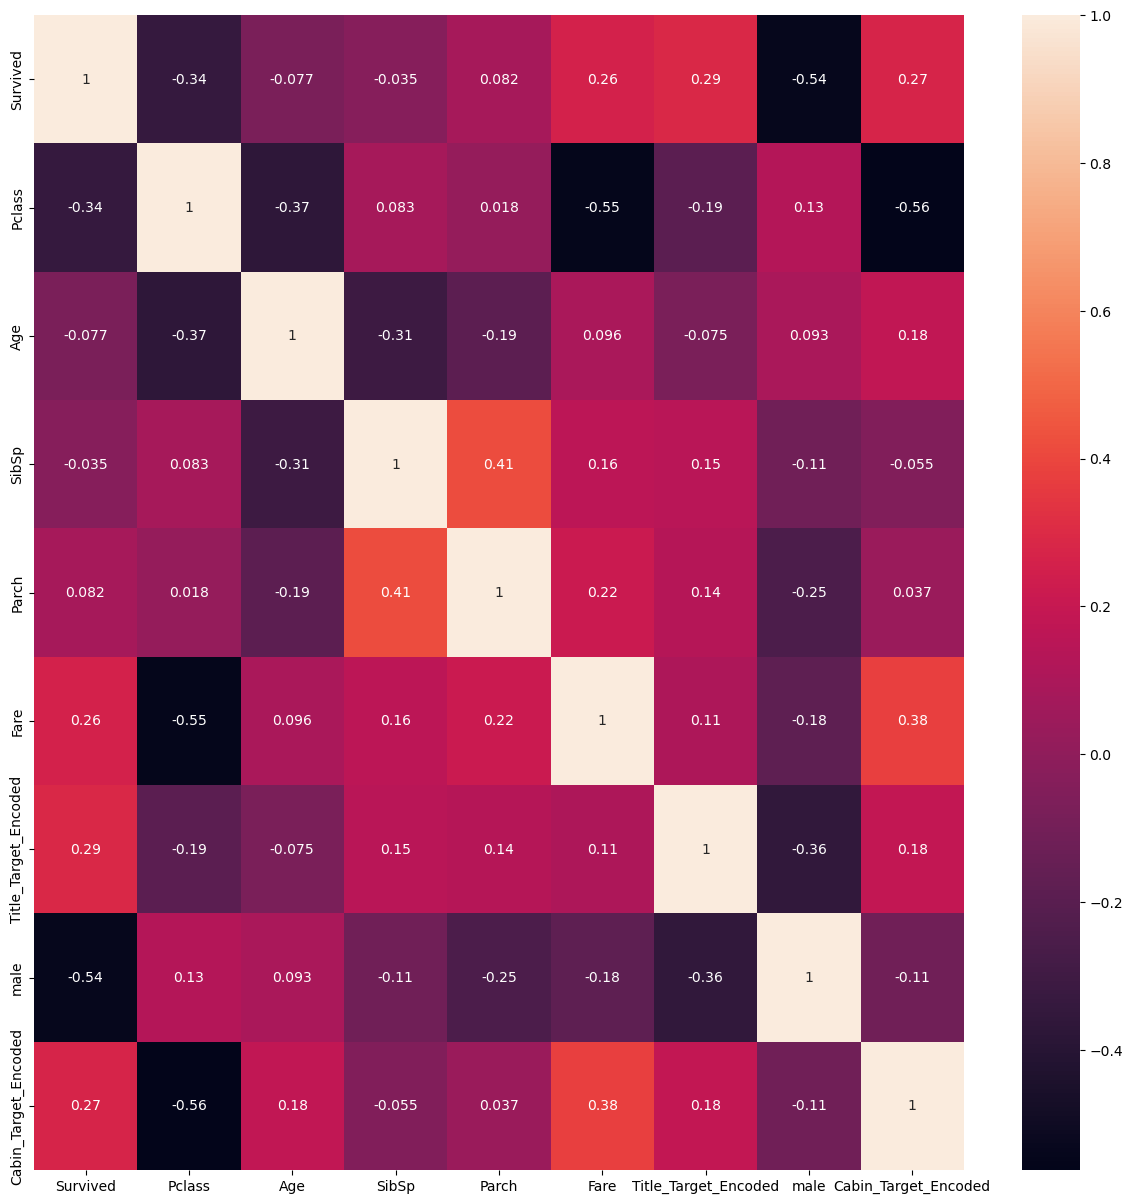

In [771]:
# Check Correlation
plt.figure(figsize = (15,15))
sns.heatmap(new_df_encoded.corr(), annot = True)

In [772]:
# Treatment with Age - Winsorization:
# There are not that many older individuals in the Titanic Data, so let's use winsorization to reduce the impact on statistical analysis.
# Additionally, the outliers are all on the upper-bound (higher outliers), so we can reduce their impact.

new_df_encoded["Age_winsorized"] = stats.mstats.winsorize(new_df_encoded["Age"], limits =[0.05,0.05])
new_df_encoded
                                                                               

/var/folders/vv/54f2s9796xj4fpznwy0p3f_c0000gn/T/ipykernel_15660/1160264506.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_encoded["Age_winsorized"] = stats.mstats.winsorize(new_df_encoded["Age"], limits =[0.05,0.05])


,Survived,Pclass,Age,SibSp,Parch,Fare,Title_Target_Encoded,male,Cabin_Target_Encoded,Age_winsorized
0,0,3,22.0,1,0,7.2500,1,True,1,22.0
1,1,1,38.0,1,0,71.2833,2,False,2,38.0
2,1,3,26.0,0,0,7.9250,3,False,1,26.0
3,1,1,35.0,1,0,53.1000,2,False,2,35.0
4,0,3,35.0,0,0,8.0500,1,True,1,35.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,6,True,1,27.0
887,1,1,19.0,0,0,30.0000,3,False,7,19.0
888,0,3,NaN,1,2,23.4500,3,False,1,NaN
889,1,1,26.0,0,0,30.0000,1,True,2,26.0


<Axes: ylabel='Age_winsorized'>

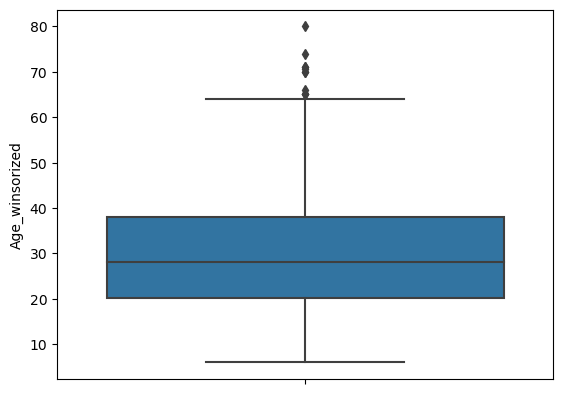

In [773]:
new_df_encoded["Age_winsorized"].value_counts(dropna = False)
new_df_encoded.isnull().sum(axis = 1).value_counts()

sns.boxplot(y = new_df_encoded["Age_winsorized"])

In [774]:
# Let's calculate average age before and after the Winsorization treatment:
print(new_df_encoded["Age"].mean()) # original age mean
print(new_df_encoded["Age_winsorized"].mean())

print("\n")

print(new_df_encoded["Age"].median()) # original age mean
print(new_df_encoded["Age_winsorized"].median())

# The 5% doesn't make a significant impact.

# Now, let's look at 

29.69911764705882
29.91456582633053


28.0
28.0


In [775]:
# Let's try dropping the rows with outliers:
new_df_2 = new_df_encoded.drop(outliers.index, axis='index')


In [776]:
# Calculate average mean now:
avg_mean = new_df_2["Age"].mean()

# Check N/A are gone:
new_df_2["Age"].count()

# The age mean barely changed, so let's stick to removing the outliers.
# Fill the N/A with the average:

new_df_2["Age"] = new_df_2["Age"].fillna(avg_mean)

new_df_2["Age"].count()


880

In [777]:
new_df_2.drop("Age_winsorized", axis = 1, inplace = True)

In [778]:
new_df_2

,Survived,Pclass,Age,SibSp,Parch,Fare,Title_Target_Encoded,male,Cabin_Target_Encoded
0,0,3,22.000000,1,0,7.2500,1,True,1
1,1,1,38.000000,1,0,71.2833,2,False,2
2,1,3,26.000000,0,0,7.9250,3,False,1
3,1,1,35.000000,1,0,53.1000,2,False,2
4,0,3,35.000000,0,0,8.0500,1,True,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,6,True,1
887,1,1,19.000000,0,0,30.0000,3,False,7
888,0,3,29.072077,1,2,23.4500,3,False,1
889,1,1,26.000000,0,0,30.0000,1,True,2


<Axes: >

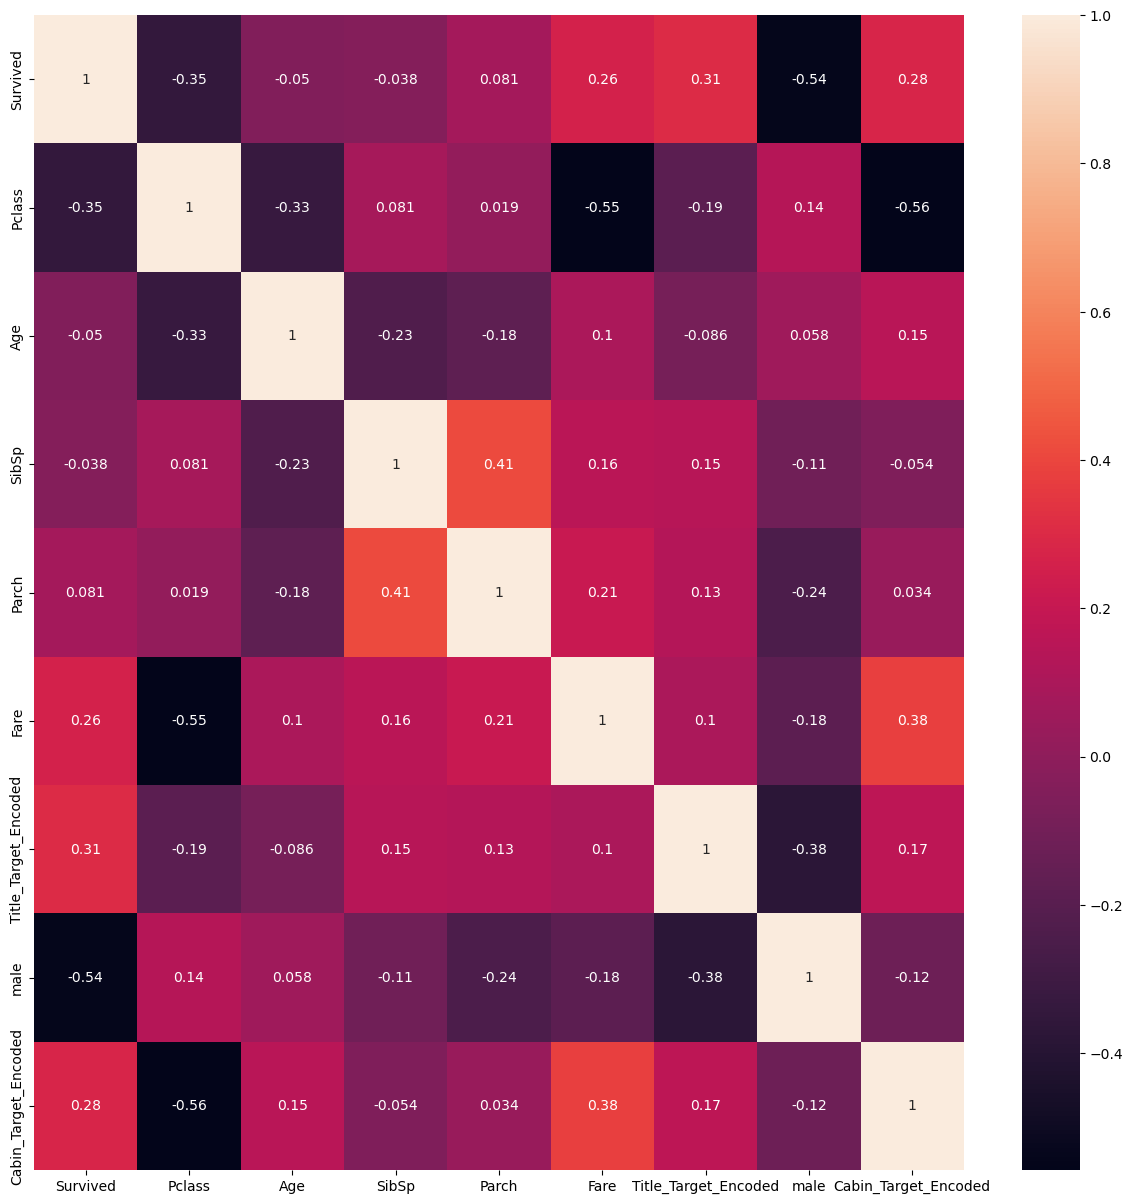

In [779]:
# Check Pearson-R again:

plt.figure(figsize = (15,15))
sns.heatmap(new_df_2.corr(), annot = True)


In [780]:
new_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880 entries, 0 to 890
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Survived              880 non-null    int64  
 1   Pclass                880 non-null    int64  
 2   Age                   880 non-null    float64
 3   SibSp                 880 non-null    int64  
 4   Parch                 880 non-null    int64  
 5   Fare                  880 non-null    float64
 6   Title_Target_Encoded  880 non-null    int64  
 7   male                  880 non-null    bool   
 8   Cabin_Target_Encoded  880 non-null    int64  
dtypes: bool(1), float64(2), int64(6)
memory usage: 62.7 KB


# What I would've done if I had more time:

Investigate missing values for Cabin_Target and "Embark" status more.

My treatment for Age was to investigate winsorization and see if it had a significant impact using 5%, it did not.
Out of the original 891 rows, as only 11 rows had outliers, I decided to remove them.

Finally, after determining the age mean and median did not change significantly with winsorization and removal of outliers, I imputed the average age into the missing rows as an estimation.

Comparing before and after, this did not have a significant impact.


# Answer the questions above:

1. Which categories of passengers were most likely to survive? What characteristics contributed to their survival?

    After completing treatment for data cleaning and removing outliers, the main categories that predict survival are: gender (male), and the "Title" of a person (i.e. Mr. Mrs., Captain). Passenger Class (PClass) also works, but it's a low-medium strength of correlation.

    This makes sense since more women and children had been saved in the Titanic sinking, so you can expect the title to provide some clues.
    Please look at my next calculations for means of each category class to determine which characteristics had highest survival.

    People who survived the Titanic tend to be:
    * Women
    * From First class (PClass = 1, Upper Class)
    * Title is more feminine (Ms., Miss, etc.)


2. What data cleaning techniques did you use, and what were the results?

    * Winsorization - didn't work that well, may need to expand range
    * Removal of outliers - worked well for age, since the 11 outliers (older individuals) only accounted for 11/890 of the data.

    Additionally, pre-and post-outlier removal, the age did not change significantly, which showed that the 11 individuals did not have much impact.

    Do note - comparing Pearson-R before and after the treatment to Age, the Pearson-R only improved by 0.02, which means the older individuals and cleaning process did not have much impact.
    
    * Imputation for Age - took the average age after removal of outliers, which did not change (29 vs. 29) after impiutation and removal.
    It helped clean up the data

    * Imputation for Cabin and data-cleaning - I extracted the "letter" of each cabin, and then put "U" for unknown.
    I made the decision to not remove the cabin data, as it accounts for a large % of the data.

3. Did you engineer any features? Which ones, and why?

    Feature Engineered for Cabin, taking the "letter" as it may indicate location.
    Feature Engineered for "Title", by taking the person's name and extracting the title.
    Feature Engineered for Sex, by making a binary, dummy variable for 0,1 (0 = Female, 1 = Male)



In [823]:
# Look into Survival:

# Male and female variable - "Male"
new_df_2.groupby("male")["Survived"].mean()

# Compare for Title now:
# Removing index apparently converts it into a dataframe
analysis= new_df_2.groupby("Title_Target_Encoded")["Survived"].mean().to_frame()

analysis = analysis.merge(legend, on="Title_Target_Encoded")

analysis.sort_values("Survived", ascending = True)

# analysis


,Survived,Title
Title_Target_Encoded,,
5,0.000000,Don
6,0.000000,Rev
17,0.000000,Jonkheer
1,0.157791,Mr
7,0.428571,Dr
10,0.500000,Major
14,0.500000,Col
4,0.575000,Master
3,0.697802,Miss


In [826]:
# Look into Cabin
new_df_2.groupby("Cabin_Target_Encoded")["Survived"].mean().sort_values()

# Weak correlation, but higher survival from Cabins 5, 3 and 7.

Cabin_Target_Encoded
9    0.000000
1    0.302496
6    0.461538
4    0.500000
2    0.593220
8    0.615385
5    0.757576
3    0.774194
7    0.777778
Name: Survived, dtype: float64

In [824]:
# Look into pclass

new_df_2.groupby("Pclass")["Survived"].mean()

# People from Upper class (Class 1) tend to have survived.


Pclass
1    0.642857
2    0.478022
3    0.243852
Name: Survived, dtype: float64

# Links:

https://www.analyticsvidhya.com/blog/2021/09/complete-guide-to-feature-engineering-zero-to-hero/
https://stackoverflow.com/questions/73170302/ordinal-encoding-in-pandas 